In [1]:
list1 = ["Dad","Delta","Brooke","Clebo","Liam","Henry"]
list2 = [42,21,20,16,14,11]

walker_fam = dict(zip(list1,list2))
print(walker_fam)

{'Dad': 42, 'Delta': 21, 'Brooke': 20, 'Clebo': 16, 'Liam': 14, 'Henry': 11}


In [2]:
walker_fam['Naomi'] = 3.5
print(walker_fam)

{'Dad': 42, 'Delta': 21, 'Brooke': 20, 'Clebo': 16, 'Liam': 14, 'Henry': 11, 'Naomi': 3.5}


In [3]:
print(f"The average age is: {sum(walker_fam.values())/len(walker_fam.values()):.2f}")

The average age is: 18.21


In [4]:
above_average = {}
for key,val in walker_fam.items():
    if val >= sum(walker_fam.values())/len(walker_fam.values()):
        print(f"{key} is {val} years old")

Dad is 42 years old
Delta is 21 years old
Brooke is 20 years old


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../../data/raw/listings.csv')
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20250613040113,2025-06-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,1,1,0,0,3.59
1,5769,https://www.airbnb.com/rooms/5769,20250613040113,2025-06-13,city scrape,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.77,4.92,NaN,f,1,0,1,0,1.65
2,6413,https://www.airbnb.com/rooms/6413,20250613040113,2025-06-14,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/hosting/Hosti...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.65
3,6448,https://www.airbnb.com/rooms/6448,20250613040113,2025-06-13,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/airflow/Hosti...,14156,...,4.98,4.97,4.88,NaN,t,1,1,0,0,2.02
4,8502,https://www.airbnb.com/rooms/8502,20250613040113,2025-06-13,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.88,4.69,4.63,NaN,f,1,1,0,0,0.29


In [7]:
df['price'].describe()

count      10708
unique       992
top       $90.00
freq          93
Name: price, dtype: object

In [8]:
df['price'] = df['price'].str.replace(r'[$,]','',regex=True).astype(float)
df['price'].describe()

count    10708.000000
mean       386.470583
std       2620.198322
min          9.000000
25%         89.000000
50%        138.000000
75%        235.000000
max      50000.000000
Name: price, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15187 entries, 0 to 15186
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15187 non-null  int64  
 1   listing_url                                   15187 non-null  object 
 2   scrape_id                                     15187 non-null  int64  
 3   last_scraped                                  15187 non-null  object 
 4   source                                        15187 non-null  object 
 5   name                                          15187 non-null  object 
 6   description                                   14840 non-null  object 
 7   neighborhood_overview                         7914 non-null   object 
 8   picture_url                                   15186 non-null  object 
 9   host_id                                       15187 non-null 

In [10]:
df[df['price']<750].groupby('host_neighbourhood')['listing_url'].nunique().sort_values(ascending=False).head(10)

host_neighbourhood
South Austin                483
East Downtown               314
Downtown Austin             293
Central Austin              258
Zilker                      258
East Riverside - Oltorf     222
Holly                       205
South Lamar                 199
Greater South River City    195
North Loop                  173
Name: listing_url, dtype: int64

In [11]:
# Run this first to see what's happening
result = df[df['price'] < 700].groupby('host_neighbourhood').agg({
    'listing_url': 'nunique',
    'price': ['mean', 'median']
})

# Look at the column structure
print(result.columns)
# You'll see: MultiIndex([('listing_url', 'nunique'), ('price', 'mean'), ('price', 'median')])

MultiIndex([('listing_url', 'nunique'),
            (      'price',    'mean'),
            (      'price',  'median')],
           )


In [12]:
# Same aggregation
result = df[df['price'] < 700].groupby('host_neighbourhood').agg({
    'listing_url': 'nunique',
    'price': ['mean', 'median']
})

# Flatten MultiIndex columns into simple strings
result.columns = ['_'.join(col) for col in result.columns]

# Check what they're called now
print(result.columns)
# Should see: Index(['listing_url_nunique', 'price_mean', 'price_median'])

# Now sort works
result.sort_values('listing_url_nunique', ascending=False).head(5)

Index(['listing_url_nunique', 'price_mean', 'price_median'], dtype='object')


,listing_url_nunique,price_mean,price_median
host_neighbourhood,,,
South Austin,481,154.440748,123.0
East Downtown,312,235.528846,187.5
Downtown Austin,291,218.920962,194.0
Central Austin,258,131.232558,104.5
Zilker,256,188.773438,125.0


In [13]:
# After flattening, rename to cleaner names
result = df[df['price'] < 700].groupby('host_neighbourhood').agg({
    'listing_url': 'nunique',
    'price': ['mean', 'median']
})

# Flatten
result.columns = ['_'.join(col) for col in result.columns]

# Rename
result = result.rename(columns={
    'listing_url_nunique': 'unique_listings',
    'price_mean': 'avg_price',
    'price_median': 'median_price'
})

# Sort and display
result.sort_values('unique_listings', ascending=False).head(5)

,unique_listings,avg_price,median_price
host_neighbourhood,,,
South Austin,481,154.440748,123.0
East Downtown,312,235.528846,187.5
Downtown Austin,291,218.920962,194.0
Central Austin,258,131.232558,104.5
Zilker,256,188.773438,125.0


In [14]:
# All in one chain
(df[df['price'] < 700]
    .groupby('host_neighbourhood')
    .agg({'listing_url': 'nunique', 'price': ['mean', 'median']})
    .pipe(lambda x: x.set_axis(['_'.join(col) for col in x.columns], axis=1))
    .rename(columns={
        'listing_url_nunique': 'unique_listings',
        'price_mean': 'avg_price', 
        'price_median': 'median_price'
    })
    .sort_values('unique_listings', ascending=False)
    .head(5)
)

,unique_listings,avg_price,median_price
host_neighbourhood,,,
South Austin,481,154.440748,123.0
East Downtown,312,235.528846,187.5
Downtown Austin,291,218.920962,194.0
Central Austin,258,131.232558,104.5
Zilker,256,188.773438,125.0


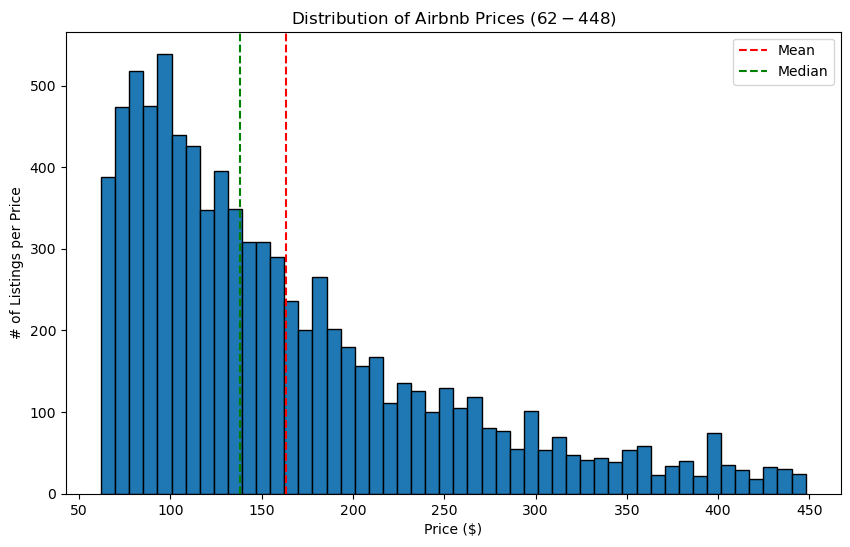

In [19]:
lower = df['price'].quantile(0.1)  # Bottom 10%
upper = df['price'].quantile(0.90)  # Top 10%
trimmed = df[(df['price'] >= lower) & (df['price'] <= upper)]

plt.figure(figsize=(10, 6))
plt.hist(trimmed['price'], bins=50, edgecolor='black')
plt.axvline(trimmed['price'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(trimmed['price'].median(), color='green', linestyle='--', label='Median')
plt.xlabel('Price ($)')
plt.ylabel('# of Listings per Price')
plt.title(f'Distribution of Airbnb Prices (${lower:.0f} - ${upper:.0f})')
plt.legend()
plt.savefig('../../visuals/histogram_distribution_airbnb_prices.png', dpi=300, bbox_inches='tight')
plt.show()